In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import patsy

In [7]:
_ = sm.datasets.get_rdataset("Arthritis", "vcd", cache=".cache")

In [8]:
dta = sm.datasets.get_rdataset("Arthritis", "vcd", cache=".cache")

In [10]:
dta.data.Improved.value_counts()

None      42
Marked    28
Some      14
Name: Improved, dtype: int64

In [11]:
df = dta.data

In [14]:
df['B_Improved'] = df['Improved'].map({'Some': True,
                                       'Marked': True,
                                       'None': False
                                      })

In [16]:
df.head()

,ID,Treatment,Sex,Age,Improved,B_Improved
0,57,Treated,Male,27,Some,True
1,46,Treated,Male,29,None,False
2,77,Treated,Male,30,None,False
3,17,Treated,Male,32,Marked,True
4,36,Treated,Male,46,Marked,True


In [36]:
X = patsy.dmatrix("Treatment + Sex + Age", data=df, return_type='dataframe')
Y = df.B_Improved

In [37]:
logit_mod = sm.Logit(Y, X)

In [38]:
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.547993
         Iterations 6


In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             B_Improved   No. Observations:                   84
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                            3
Date:                Sun, 03 Apr 2016   Pseudo R-squ.:                  0.2094
Time:                        09:24:52   Log-Likelihood:                -46.031
converged:                       True   LL-Null:                       -58.224
                                        LLR p-value:                 2.075e-05
========================================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               -3.0155      1.168     -2.582      0.010        -5.304    -0.727
Treatment[T.Treated]     1.7598      0.536      3.280      0.001         0.708     2.811
Sex[T.Male]             -1.4878      0.595     -2.502      0.012        -2.654    -0.322
Age                      0.0487      0.021      2.359      0.018         0.008     0.089
========================================================================================
"""

In [40]:
results.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:             B_Improved
Method:                          dydx
At:                           overall
========================================================================================
                          dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Treatment[T.Treated]     0.3238      0.074      4.403      0.000         0.180     0.468
Sex[T.Male]             -0.2738      0.095     -2.878      0.004        -0.460    -0.087
Age                      0.0090      0.003      2.689      0.007         0.002     0.016
========================================================================================
"""

In [41]:
Y = df.Improved

In [42]:
mlogit_mod = sm.MNLogit(Y, X)

In [43]:
results = mlogit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.850209
         Iterations 6


In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:               Improved   No. Observations:                   84
Model:                        MNLogit   Df Residuals:                       76
Method:                           MLE   Df Model:                            6
Date:                Sun, 03 Apr 2016   Pseudo R-squ.:                  0.1594
Time:                        09:26:50   Log-Likelihood:                -71.418
converged:                       True   LL-Null:                       -84.958
                                        LLR p-value:                 0.0001398
========================================================================================
       Improved=None       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                3.6465      1.334      2.733      0.006         1.031     6.262
Treatment[T.Treated]    -2.1447      0.609     -3.524      0.000        -3.338    -0.952
Sex[T.Male]              1.3900      0.656      2.118      0.034         0.104     2.677
Age                     -0.0475      0.023     -2.054      0.040        -0.093    -0.002
----------------------------------------------------------------------------------------
       Improved=Some       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               -0.1695      1.800     -0.094      0.925        -3.697     3.358
Treatment[T.Treated]    -1.0687      0.698     -1.530      0.126        -2.438     0.300
Sex[T.Male]             -0.3026      0.908     -0.333      0.739        -2.082     1.477
Age                      0.0036      0.031      0.117      0.907        -0.056     0.063
========================================================================================
"""

In [45]:
results.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:               Improved
Method:                          dydx
At:                           overall
========================================================================================
     Improved=Marked      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Treatment[T.Treated]     0.3151      0.073      4.306      0.000         0.172     0.459
Sex[T.Male]             -0.1406      0.106     -1.329      0.184        -0.348     0.067
Age                      0.0052      0.004      1.414      0.157        -0.002     0.012
----------------------------------------------------------------------------------------
       Improved=None      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Treatment[T.Treated]    -0.3210      0.074     -4.351      0.000        -0.466    -0.176
Sex[T.Male]              0.2767      0.096      2.876      0.004         0.088     0.465
Age                     -0.0090      0.003     -2.696      0.007        -0.016    -0.002
----------------------------------------------------------------------------------------
       Improved=Some      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Treatment[T.Treated]     0.0059      0.070      0.084      0.933        -0.131     0.142
Sex[T.Male]             -0.1360      0.106     -1.288      0.198        -0.343     0.071
Age                      0.0038      0.003      1.081      0.280        -0.003     0.011
========================================================================================
"""

In [47]:
df.to_stata('arthritus.dta')

    . logit B_Improved treat sex Age
    
    Iteration 0:   log likelihood = -58.224363  
    Iteration 1:   log likelihood = -46.120282  
    Iteration 2:   log likelihood = -46.031647  
    Iteration 3:   log likelihood = -46.031402  
    Iteration 4:   log likelihood = -46.031402  
    
    Logistic regression                               Number of obs   =         84
                                                      LR chi2(3)      =      24.39
                                                      Prob > chi2     =     0.0000
    Log likelihood = -46.031402                       Pseudo R2       =     0.2094
    
    ------------------------------------------------------------------------------
      B_Improved |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
    -------------+----------------------------------------------------------------
           treat |   1.759804   .5364955     3.28   0.001     .7082924    2.811316
             sex |  -1.487831   .5947694    -2.50   0.012    -2.653558   -.3221046
             Age |   .0487465   .0206629     2.36   0.018     .0082479    .0892452
           _cons |  -3.287434   1.449412    -2.27   0.023     -6.12823    -.446638
    ------------------------------------------------------------------------------


    . margins, dydx(*)
    
    Average marginal effects                          Number of obs   =         84
    Model VCE    : OIM
    
    Expression   : Pr(B_Improved), predict()
    dy/dx w.r.t. : treat sex Age
    
    ------------------------------------------------------------------------------
                 |            Delta-method
                 |      dy/dx   Std. Err.      z    P>|z|     [95% Conf. Interval]
    -------------+----------------------------------------------------------------
           treat |   .3238183   .0735499     4.40   0.000     .1796631    .4679735
             sex |   -.273773   .0951228    -2.88   0.004    -.4602103   -.0873358
             Age |   .0089698    .003336     2.69   0.007     .0024312    .0155083
    ------------------------------------------------------------------------------


    . mlogit improve treat sex Age

    Iteration 0:   log likelihood = -84.957958  
    Iteration 1:   log likelihood = -71.577377  
    Iteration 2:   log likelihood = -71.418045  
    Iteration 3:   log likelihood = -71.417555  
    Iteration 4:   log likelihood = -71.417555  

    Multinomial logistic regression                   Number of obs   =         84
                                                      LR chi2(6)      =      27.08
                                                      Prob > chi2     =     0.0001
    Log likelihood = -71.417555                       Pseudo R2       =     0.1594

    ------------------------------------------------------------------------------
         improve |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
    -------------+----------------------------------------------------------------
    Marked       |
           treat |   2.144733   .6086598     3.52   0.000     .9517818    3.337684
             sex |  -1.390033   .6563779    -2.12   0.034     -2.67651   -.1035561
             Age |    .047497   .0231275     2.05   0.040     .0021678    .0928261
           _cons |  -4.401247   1.678671    -2.62   0.009    -7.691383   -1.111111
    -------------+----------------------------------------------------------------
    None         |  (base outcome)
    -------------+----------------------------------------------------------------
    Some         |
           treat |    1.07607   .6902589     1.56   0.119    -.2768126    2.428953
             sex |  -1.692597   .8710234    -1.94   0.052    -3.399771    .0145777
             Age |   .0510761   .0288193     1.77   0.076    -.0054088     .107561
           _cons |  -3.199487   2.012402    -1.59   0.112    -7.143722    .7447486
    ------------------------------------------------------------------------------


    . margins, dydx(*)

    Average marginal effects                          Number of obs   =         84
    Model VCE    : OIM

    Expression   : Pr(improve==Marked), predict()
    dy/dx w.r.t. : treat sex Age

    ------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      z    P>|z|     [95% Conf. Interval]
    -------------+----------------------------------------------------------------
       treat |   .3151456   .0731874     4.31   0.000     .1717009    .4585903
         sex |  -.1406108   .1058278    -1.33   0.184    -.3480295    .0668079
         Age |   .0052369   .0037041     1.41   0.157    -.0020229    .0124967
    ------------------------------------------------------------------------------


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [51]:
%matplotlib inline

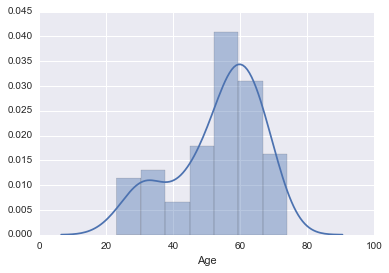

In [52]:
sns.distplot(df['Age'])

In [56]:
df['age_cat'] = pd.cut(df['Age'], 4)
df['age_cat'].value_counts()

(48.5, 61.25]      33
(61.25, 74]        26
(35.75, 48.5]      13
(22.949, 35.75]    12
dtype: int64

In [57]:
X = patsy.dmatrix("Treatment + Sex + age_cat", data=df, return_type='dataframe')
Y = df.B_Improved

In [58]:
logit_mod = sm.Logit(Y, X)

In [59]:
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.548688
         Iterations 6


In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             B_Improved   No. Observations:                   84
Model:                          Logit   Df Residuals:                       78
Method:                           MLE   Df Model:                            5
Date:                Sun, 03 Apr 2016   Pseudo R-squ.:                  0.2084
Time:                        10:20:58   Log-Likelihood:                -46.090
converged:                       True   LL-Null:                       -58.224
                                        LLR p-value:                 0.0001927
============================================================================================
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -1.1396      0.716     -1.592      0.111        -2.542     0.263
Treatment[T.Treated]         1.8908      0.553      3.418      0.001         0.807     2.975
Sex[T.Male]                 -1.6145      0.609     -2.653      0.008        -2.807    -0.422
age_cat[T.(35.75, 48.5]]    -0.4551      0.956     -0.476      0.634        -2.329     1.419
age_cat[T.(48.5, 61.25]]     1.0150      0.772      1.315      0.188        -0.498     2.528
age_cat[T.(61.25, 74]]       1.1948      0.792      1.508      0.132        -0.358     2.748
============================================================================================
"""

In [61]:
results.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:             B_Improved
Method:                          dydx
At:                           overall
============================================================================================
                              dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Treatment[T.Treated]         0.3495      0.074      4.734      0.000         0.205     0.494
Sex[T.Male]                 -0.2984      0.096     -3.121      0.002        -0.486    -0.111
age_cat[T.(35.75, 48.5]]    -0.0841      0.176     -0.477      0.633        -0.430     0.261
age_cat[T.(48.5, 61.25]]     0.1876      0.137      1.369      0.171        -0.081     0.456
age_cat[T.(61.25, 74]]       0.2209      0.139      1.591      0.112        -0.051     0.493
============================================================================================
"""